**Poetry Classification Notebook**

I've came across this dataset as I was looking for renaissance paintings to use in GAN, and seeing there are no kernels on it, I thought I might just dive in. 
There are five columns, the poetry itself, the type, author, age of it. First I'll do exploratory data analysis and preprocessing, then I'll classify the author and the age of the poetries using decision trees.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import gc
import re

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import GRU, LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Activation, Dense, Bidirectional

**Importing the dataset**

In [4]:
df_poetry=pd.read_csv("../input/poetry-analysis-with-machine-learning/all.csv", sep=",")
df_poetry.head()

,author,content,poem name,age,type
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore


First I'll do exploratory data analysis, then classify the poetries in age, type and author. Let's see the list of authors, types and ages.

In [5]:
df_poetry.rename(columns={"poem name":"poem_name"}, inplace=True)

In [6]:
df_poetry.age.unique()

array(['Renaissance', 'Modern'], dtype=object)

There are three types of poetry.

In [7]:
df_poetry.type.unique()

array(['Mythology & Folklore', 'Nature', 'Love'], dtype=object)

Let's see the list of authors.

In [8]:
df_poetry.author.unique()

array(['WILLIAM SHAKESPEARE', 'DUCHESS OF NEWCASTLE MARGARET CAVENDISH',
       'THOMAS BASTARD', 'EDMUND SPENSER', 'RICHARD BARNFIELD',
       'SIR WALTER RALEGH', 'QUEEN ELIZABETH I', 'JOHN DONNE',
       'JOHN SKELTON', 'CHRISTOPHER MARLOWE', 'LADY MARY WROTH',
       'ROBERT SOUTHWELL, SJ', 'WILLIAM BYRD', 'GEORGE GASCOIGNE',
       'HENRY VIII, KING OF ENGLAND', 'SIR THOMAS WYATT', 'EN JONSON',
       'ORLANDO GIBBONS', 'THOMAS NASHE', 'SIR PHILIP SIDNEY',
       'SECOND BARON VAUX OF HARROWDEN THOMAS, LORD VAUX',
       'HENRY HOWARD, EARL OF SURREY', 'GEORGE CHAPMAN', 'THOMAS CAMPION',
       'ISABELLA WHITNEY', 'SAMUEL DANIEL', 'THOMAS HEYWOOD',
       'GIOVANNI BATTISTA GUARINI', 'SIR EDWARD DYER', 'THOMAS LODGE',
       'JOHN FLETCHER', 'EDGAR LEE MASTERS', 'WILLIAM BUTLER YEATS',
       'FORD MADOX FORD', 'IVOR GURNEY', 'CARL SANDBURG', 'EZRA POUND',
       'ELINOR WYLIE', 'GEORGE SANTAYANA', 'LOUISE BOGAN',
       'KENNETH SLESSOR', 'HART CRANE', 'D. H. LAWRENCE',
       'H

**Removing special characters from the content column, leaving the spaces for tokenization**

In [9]:
def remove_special_chars(text, remove_digits=True):
    text=re.sub('[^a-zA-Z.\d\s]', '',text)
    return text
df_poetry.content=df_poetry.content.apply(remove_special_chars)

Importing the list of stopwords, I have gathered the below gist def remove_stopwords from another notebook.

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_poetry.age=le.fit_transform(df_poetry.age)
df_poetry

,author,content,poem_name,age,type
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,1,Mythology & Folklore
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,Sir Charles into my chamber coming in\r\nWhen ...,An Epilogue to the Above,1,Mythology & Folklore
2,THOMAS BASTARD,Our vice runs beyond all that old men saw\r\nA...,"Book 7, Epigram 42",1,Mythology & Folklore
3,EDMUND SPENSER,Lo I the man whose Muse whilome did maske\r\nA...,"from The Faerie Queene: Book I, Canto I",1,Mythology & Folklore
4,RICHARD BARNFIELD,Long have I longd to see my love againe\r\nSti...,Sonnet 16,1,Mythology & Folklore
...,...,...,...,...,...
568,SARA TEASDALE,With the man I love who loves me not\r\nI walk...,Union Square,0,Love
569,HART CRANE,Hart Crane Voyages I II III IV V VI from The C...,Voyages,0,Love
570,WILLIAM BUTLER YEATS,When you are old and grey and full of sleep\r\...,When You Are Old,0,Love
571,CARL SANDBURG,Give me hunger\r\nO you gods that sit and give...,At a Window,0,Love


In [11]:
df_poetry.drop(columns=["author", "poem_name","type"])

,content,age
0,Let the bird of loudest lay\r\nOn the sole Ara...,1
1,Sir Charles into my chamber coming in\r\nWhen ...,1
2,Our vice runs beyond all that old men saw\r\nA...,1
3,Lo I the man whose Muse whilome did maske\r\nA...,1
4,Long have I longd to see my love againe\r\nSti...,1
...,...,...
568,With the man I love who loves me not\r\nI walk...,0
569,Hart Crane Voyages I II III IV V VI from The C...,0
570,When you are old and grey and full of sleep\r\...,0
571,Give me hunger\r\nO you gods that sit and give...,0


In [12]:
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=1009)
tokenizer.fit_on_texts(df_poetry.content)
sequences=tokenizer.texts_to_sequences(df_poetry.content)
tokenized=tokenizer.texts_to_matrix(df_poetry.content)
word_index=tokenizer.word_index
print("Found %s unique tokens."%len(word_index))

Using TensorFlow backend.


Found 14170 unique tokens.


In [13]:
tokenized

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [14]:
tokenized.shape

(573, 1009)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_poetry.content)


In [15]:
X=tokenized
Y=df_poetry.age

In [16]:
tokenized.shape

(573, 1009)

In [17]:
df_poetry.age.shape

(573,)

In [18]:
X_train, X_test, y_train, y_test =train_test_split(X,Y,test_size=0.2)

In [19]:
X_train=tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=300)
X_test=tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=300)

In [22]:
max_features=10
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
model = tf.keras.Sequential([Embedding(input_dim=100, output_dim=128),
                            LSTM(64,activation='relu', dropout=0.05, return_sequences=True),
                            LSTM(64, activation="relu",dropout=0.05,recurrent_dropout=0.05, return_sequences=True),
                            LSTM(32, activation="relu",dropout=0.05,recurrent_dropout=0.05),
                            Dense(2, activation="relu"),
                            Dense(1, activation="sigmoid")])
opt=tf.keras.optimizers.RMSprop()
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["acc"])

In [23]:
model.fit(X_train, y_train.values, epochs=100, batch_size=40, validation_split=0.1, callbacks=[callback])

Train on 412 samples, validate on 46 samples
Epoch 1/100
412/412 [==============================] - 17s 40ms/sample - loss: 0.6927 - acc: 0.5388 - val_loss: 0.6928 - val_acc: 0.5217
Epoch 2/100
412/412 [==============================] - 9s 21ms/sample - loss: 0.6920 - acc: 0.5655 - val_loss: 0.6927 - val_acc: 0.5217
Epoch 3/100
412/412 [==============================] - 10s 23ms/sample - loss: 0.6916 - acc: 0.5655 - val_loss: 0.6926 - val_acc: 0.5217
Epoch 4/100
412/412 [==============================] - 9s 22ms/sample - loss: 0.6913 - acc: 0.5655 - val_loss: 0.6926 - val_acc: 0.5217
Epoch 5/100
412/412 [==============================] - 9s 21ms/sample - loss: 0.6910 - acc: 0.5655 - val_loss: 0.6925 - val_acc: 0.5217
Epoch 6/100
412/412 [==============================] - 9s 21ms/sample - loss: 0.6906 - acc: 0.5655 - val_loss: 0.6924 - val_acc: 0.5217
Epoch 7/100
412/412 [==============================] - 9s 22ms/sample - loss: 0.6904 - acc: 0.5655 - val_loss: 0.6924 - val_acc: 0.5217
E

In [24]:
model.evaluate(X_test, y_test)

115/115 [==============================] - 1s 5ms/sample - loss: 0.6960 - acc: 0.5043


[0.6960138279458751, 0.5043478]

In [25]:
df_poetry=pd.read_csv("../input/poetry-analysis-with-machine-learning/all.csv", sep=",")
df_poetry.head()

,author,content,poem name,age,type
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore


**Most used 20 words**

In [26]:
import plotly.graph_objects as go
from plotly.offline import iplot
words = df_poetry['content'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = words.index.values[2:20],
            y = words.values[2:20],
            marker= dict(colorscale='RdBu',
                         color = words.values[2:40]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Most used words excluding stopwords'
)

fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='basic-bar')

**Creating word cloud from most used 100 words**

In [27]:
import matplotlib.pyplot as plt
def word_cloud(content, title):
    wc = WordCloud(background_color='white', max_words=200,
                  stopwords=STOPWORDS, max_font_size=50)
    wc.generate(" ".join(content))
    plt.figure(figsize=(16, 13))
    plt.title(title, fontsize=20)
    plt.imshow(wc.recolor(colormap='Pastel2', random_state=42), alpha=0.98)
    plt.axis('off')

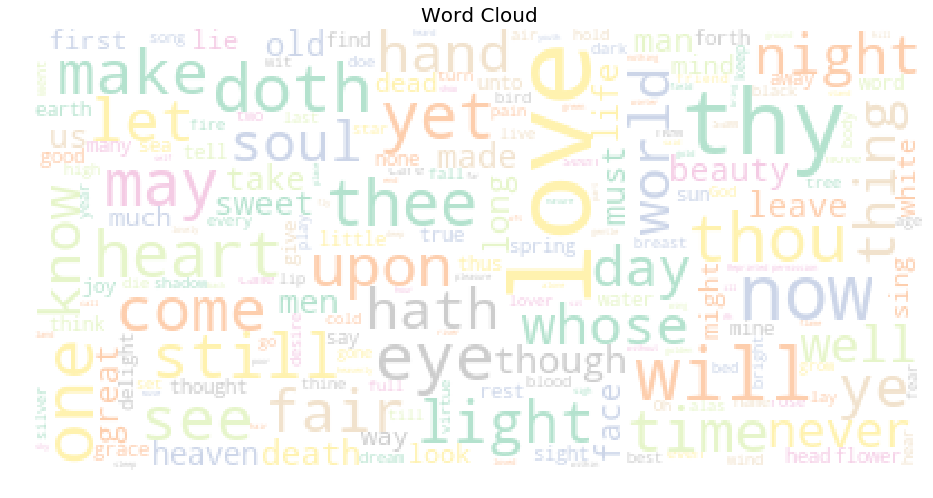

In [28]:
word_cloud(df_poetry.content, "Word Cloud")

I expect strong correlation between label encoded features.

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_poetry.type=le.fit_transform(df_poetry.type)
df_poetry.age=le.fit_transform(df_poetry.age)
df_poetry.author=le.fit_transform(df_poetry.author)

In [30]:
corr = df_poetry.corr()
corr

,author,age,type
author,1.000000,0.287501,-0.146664
age,0.287501,1.000000,-0.437088
type,-0.146664,-0.437088,1.000000


Heat map between label encoded features.

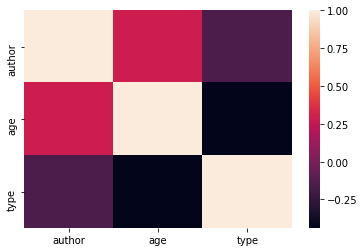

In [31]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Categorical plot to explain distribution of type and authors of poetry through the ages. It'd be better if the ages were given in years instead of two categories.

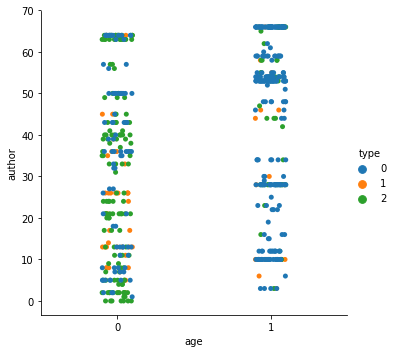

In [32]:
sns.catplot(x="age", y="author",hue="type", data=df_poetry);

First I'll separate the dataset for training and test, then I'll vectorize both sets with TFIDF and Count Vectorizer, and then apply decision tree for classification.

In [33]:
y=df_poetry['author']
x=df_poetry["content"]
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.33, random_state=50)
print(X_train)

526    [i carry your heart with me(i carry it in] Cop...
63     Full fathom five thy father lies;\r\nOf his bo...
158    Love is a sickness full of woes,\r\nAll remedi...
248    No spring nor summer beauty hath such grace\r\...
175    Come away, come away, death,\r\n    And in sad...
                             ...                        
70     How like a winter hath my absence been\r\nFrom...
132    Stella, think not that I by verse seek fame,\r...
289    If thou survive my well-contented day,\r\nWhen...
109    Ye tradefull Merchants that with weary toyle,\...
480    [Version 1: 1921]\r\nThe quick sparks on the g...
Name: content, Length: 383, dtype: object


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectrain = vectorizer.fit_transform(X_train)
vectest = vectorizer.transform(X_test)

In [35]:
vectest.shape

(190, 9936)

In [36]:
y_train.shape

(383,)

In [37]:
dtclassifier=DecisionTreeClassifier(criterion="entropy", max_depth=None)
dtclassifier.fit(vectrain,y_train)
preddt = dtclassifier.predict(vectest)

In [38]:
accuracy= accuracy_score(preddt,y_test)
print(accuracy)

0.35789473684210527


Trying to predict the age of the poem from the content. Used Count Vectorizer and Decision Tree Classifier with entropy.

In [39]:
y=df_poetry['age']
x=df_poetry["content"]
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.33, random_state=50)

In [40]:
vectorizer = TfidfVectorizer()
vectrain = vectorizer.fit_transform(X_train)
vectest = vectorizer.transform(X_test)

In [41]:
dtclassifier=DecisionTreeClassifier(criterion="entropy", max_depth=None)
dtclassifier.fit(vectrain,y_train)
preddt = dtclassifier.predict(vectest)

In [42]:
accuracy= accuracy_score(preddt,y_test)
print(accuracy)

0.868421052631579


Trying to predict authors from rest of the features this time, I don't expect too much of an improvement. Used Tfidf vectorizer and decision tree with gini index as split criterion.

In [43]:
y=df_poetry['author']
X=df_poetry.loc[:, df_poetry.columns!="author"]
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.33, random_state=50)

In [44]:
vectorizer = TfidfVectorizer()
vectrain = vectorizer.fit_transform(X_train)
vectest = vectorizer.transform(X_test)

In [45]:
dtclassifier=DecisionTreeClassifier(criterion="gini", max_depth=None)
dtclassifier.fit(vectrain,y_train)
preddt = dtclassifier.predict(vectest)

In [46]:
accuracy= accuracy_score(preddt,y_test)
print(accuracy)

0.4
